# Write and Save Files in Python

## Objectives
After completing this lab you will be able to:
* Write to files using Python libraries

## Table of Contents
* Writing Files
* Appending Files
* Additional File modes
* Copy a File

## Writing Files
We can open a file object using the method <code>write()</code> to save the text file to a list. To write to a file, the mode argument must be set to **w**. Let’s write a file **Example2.txt** with the line: **“This is line A”**

In [5]:
File_path = exmp2
exmp2 = 'Example2.txt'
with open(exmp2, 'w') as writefile:
    writefile.write("This is line A")

We can read the file to see if it worked:

In [6]:
# Read file

with open(exmp2, 'r') as testwritefile:
    print(testwritefile.read())

This is line A


We can write multiple lines:

In [8]:
# Write lines to file

with open(exmp2, 'w') as writefile:
    writefile.write("This is line A\n")
    writefile.write("This is line B\n")

The method <code>.write()</code> works similar to the method <code>.readline()</code>, except instead of reading a new line it writes a new line. The process is illustrated in the figure. The different colour coding of the grid represents a new line added to the file after each method call.

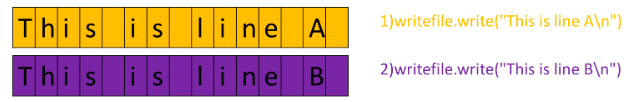

You can check the file to see if your results are correct

In [9]:
# Check whether write to file

with open(exmp2, 'r') as testwritefile:
    print(testwritefile.read())

This is line A
This is line B



We write a list to a **.txt** file as follows:

In [10]:
# Sample list of text

Lines = ["This is line A\n", "This is line B\n", "This is line C\n"]
Lines

['This is line A\n', 'This is line B\n', 'This is line C\n']

In [12]:
# Write the strings in the list to text file

with open(exmp2, 'w') as writefile:
    for line in Lines:
        print(line)
        writefile.write(line)

This is line A

This is line B

This is line C



We can verify the file is written by reading it and printing out the values:

In [14]:
# Verify if writing to file is successfully executed

with open(exmp2, 'r') as testwritefile:
    print(testwritefile.read())

This is line A
This is line B
This is line C



However, note that setting the mode to **w** overwrites all the existing data in the file.

In [17]:
with open(exmp2, 'w') as writefile:
    writefile.write("Overwrite\n")
with open(exmp2, 'r') as testwritefile:
    print(testwritefile.read())

Overwrite



## Appending Files
We can write to files without losing any of the existing data as follows by setting the mode argument to append: **a**. you can append a new line as follows:

In [19]:
# Write a new line to text file

with open(exmp2, 'a') as testwritefile:
    testwritefile.write("This is line C\n")
    testwritefile.write("This is line D\n")
    testwritefile.write("This is line E\n")

You can verify the file has changed by running the following cell:

In [22]:
# Verify if the new line is in the text file

with open(exmp2, 'r') as testwritefile:
    print(testwritefile.read())

Overwrite
This is line C
This is line D
This is line E



## Additional modes

It's fairly ineffecient to open the file in **a** or **w** and then reopening it in **r** to read any lines. Luckily we can access the file in the following modes:

* **r+** : Reading and writing. Cannot truncate the file.
* **w+** : Writing and reading. Truncates the file.
* **a+** : Appending and Reading. Creates a new file, if none exists. You dont have to dwell on the specifics of each mode for this lab.

Let's try out the **a+** mode:

In [23]:
with open(exmp2, 'a+') as testwritefile:
    testwritefile.write("This is line E\n")
    print(testwritefile.read())

There were no errors but <code>read()</code> also did not output anything. This is because of our location in the file.

Most of the file methods we've looked at work in a certain location in the file. <code>.write() </code> writes at a certain location in the file. <code>.read()</code> reads at a certain location in the file and so on. You can think of this as moving your pointer around in the notepad to make changes at specific location.

Opening the file in **w** is akin to opening the .txt file, moving your cursor to the beginning of the text file, writing new text and deleting everything that follows.

Whereas opening the file in **a** is similiar to opening the .txt file, moving your cursor to the very end and then adding the new pieces of text. <br>
It is often very useful to know where the 'cursor' is in a file and be able to control it. The following methods allow us to do precisely this -
- <code>.tell()</code> - returns the current position in bytes
- <code>.seek(offset,from)</code> - changes the position by 'offset' bytes with respect to 'from'. From can take the value of 0,1,2 corresponding to beginning, relative to current position and end

Now lets revisit **a+**

In [25]:
with open(exmp2, 'a+') as testwritefile:
    print("Initial Location: {}".format(testwritefile.tell()))
    
    data = testwritefile.read()
    if (not data):  #empty strings return false in python
            print('Read nothing') 
    else: 
            print(testwritefile.read())
            
    testwritefile.seek(0,0) # move 0 bytes from beginning.
    
    print("\nNew Location : {}".format(testwritefile.tell()))
    data = testwritefile.read()
    if (not data): 
            print('Read nothing') 
    else: 
            print(data)
    
    print("Location after read: {}".format(testwritefile.tell()) )

Initial Location: 75
Read nothing

New Location : 0
Overwrite
This is line C
This is line D
This is line E
This is line E

Location after read: 75


Finally, a note on the difference between **w+** and **r+**. Both of these modes allow access to read and write methods, however, opening a file in **w+** overwrites it and deletes all pre-existing data.

In the following code block, Run the code as it is first and then run it without the <code>.truncate()</code>.

In [27]:
with open(exmp2, 'r+') as testwritefile:
    testwritefile.seek(0,0) #write at beginning of file
    testwritefile.write("Line 1" + "\n")
    testwritefile.write("Line 2" + "\n")
    testwritefile.write("Line 3" + "\n")
    testwritefile.write("Line 4" + "\n")
    testwritefile.write("finished\n")
    testwritefile.seek(0,0)
    print(testwritefile.read())

Line 1
Line 2
Line 3
Line 4
finished

This is line E
This is line E



To work with a file on existing data, use **r+** and **a+**. While using **r+**, it can be useful to add a <code>.truncate()</code> method at the end of your data. This will reduce the file to your data and delete everything that follows. <br>

In [29]:
with open(exmp2, 'r+') as testwritefile:
    testwritefile.seek(0,0) #write at beginning of file
    testwritefile.write("Line 1" + "\n")
    testwritefile.write("Line 2" + "\n")
    testwritefile.write("Line 3" + "\n")
    testwritefile.write("Line 4" + "\n")
    testwritefile.write("finished\n")
    #Uncomment the line below
    testwritefile.truncate()
    testwritefile.seek(0,0)
    print(testwritefile.read())

Line 1
Line 2
Line 3
Line 4
finished



## Copy a File
Let's copy the file **Example2.txt** to the file **Example3.txt**:

In [32]:
# Copy file to another
exmp3 = 'Example3.txt'
with open(exmp2,'r') as readfile:
    with open(exmp3,'w') as writefile:
          for line in readfile:
                writefile.write(line)

We can read the file to see if everything works:

In [33]:
# Verify if the copy is successfully executed

with open(exmp3,'r') as testwritefile:
    print(testwritefile.read())

Line 1
Line 2
Line 3
Line 4
finished



After reading files, we can also write data into files and save them in different file formats like **.txt, .csv, .xls (for excel files)** etc. You will come across these in further examples

**NOTE:** If you wish to open and view the <code>example3.txt</code> file, download this lab here and run it locally on your machine. Then go to the working directory to ensure the <code>example3.txt</code> file exists and contains the summary data that we wrote.